In [35]:
import pandas as pd
from matplotlib import pyplot as plt
import psycopg2

In [36]:
conn = psycopg2.connect(dbname='reddit-db', user="postgres", host='localhost', password='password', port='5432')
sql = """SELECT posts.author
	,title
	,split_part(permalink, '/', 3) AS subreddit
	,to_timestamp(created)::date AS day	
	,author_classes.class_num as class
	FROM posts
	
	INNER JOIN author_classes ON
	posts.author = author_classes.author
	
WHERE to_timestamp(created)::date >= '2022-04-01'
and title not like '%KAILASA%'"""

In [37]:
df = pd.read_sql(sql, conn)

In [38]:
subreddits = ["benshapiro", "BidenWatch", "Conservative", "conservatives", "conspiracy", "economy", "Liberal", "politics", "Republican", "republicans", "worldnews"]

In [39]:
df_0 = df[df['class'] == 0]
df_1 = df[df['class'] == 1]
df_2 = df[df['class'] == 2]

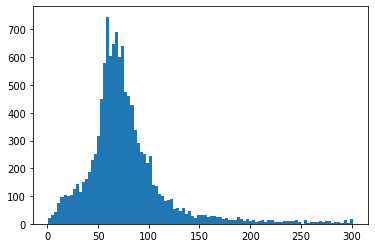

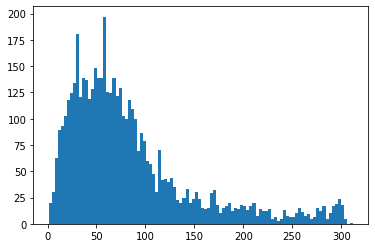

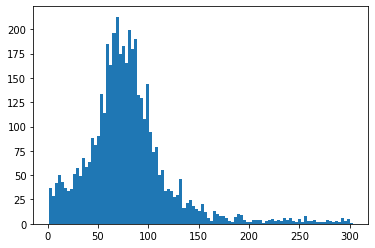

In [40]:
dfs = [df_0, df_1, df_2]
#plot character count of each class's posts
for i in dfs:
    plt.hist(i["title"].str.len(), bins=100)
    plt.show()

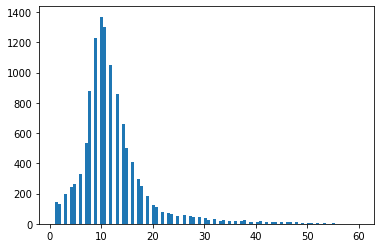

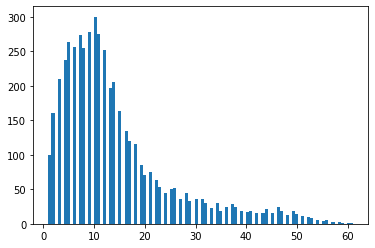

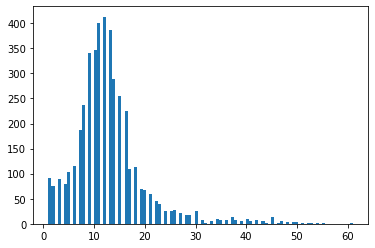

In [41]:
#plot word count of title in each class histogram
for i in dfs:
    plt.hist(i["title"].str.split().str.len(), bins=100)
    plt.show()

In [42]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from collections import defaultdict
import nltk as nltk

In [43]:
nltk.download('stopwords')
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\steve\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [44]:
def get_corpus(df):
    corpus = []
    for i in df['title']:
        words = word_tokenize(i)
        words = [w for w in words if w not in stop]
        corpus.append(words)
    return corpus

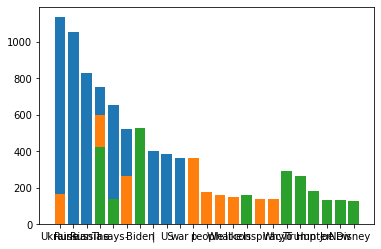

In [45]:
for df in dfs:
    corpus = []
    title = df['title'].str.split()
    title = title.values.tolist()
    corpus = [word for i in title for word in i]
    dic = defaultdict(int)
    for word in corpus:
        if word not in stop:
            dic[word] += 1
    top = sorted(dic.items(), key=lambda X:X[1], reverse=True)[:10]
    x,y=zip(*top)
    plt.bar(x,y)

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

In [50]:
def generate_top_ngrams(text, n=3):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:5]
    x,y=map(list,zip(*top_n_bigrams))
    return list(zip(x,y))

In [51]:
df_ngrams_0 = pd.DataFrame(generate_top_ngrams(df_0['title']), columns=['ngram', 'count'])
df_ngrams_1 = pd.DataFrame(generate_top_ngrams(df_1['title']), columns=['ngram', 'count'])
df_ngrams_2 = pd.DataFrame(generate_top_ngrams(df_2['title']), columns=['ngram', 'count'])

In [53]:
print('April')
print("normies---")
print(df_ngrams_0)
print("kinda sus---")
print(df_ngrams_1)
print("weirdos---")
print(df_ngrams_2)

April
normies---
                    ngram  count
0   ketanji brown jackson    115
1          war in ukraine     69
2  marjorie taylor greene     43
3             don say gay     41
4    human rights council     40
kinda sus---
               ngram  count
0       do you think     25
1    the great reset     22
2        what do you     22
3    new world order     21
4  the united states     21
weirdos---
                     ngram  count
0      hunter biden laptop     53
1    ketanji brown jackson     44
2      parental rights law     30
3  florida parental rights     29
4       black lives matter     26
